# Inference in Bayesian Networks

This notebook illustrates the Bayesian Network for the "Wet Grass" example discussed in the course book "Inference & Causality", unit 1.2, based
on: Murphy, K.  (2001).  An introduction to graphical models.Rap. tech,96,1–19

In [7]:
%%capture
!pip install pgmpy

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt

First we define the Bayesian network by specifying which nodes are connected to which.
The following shortcuts are used:
* C: Cloudy
* S: Sprinkler
* R: Rain
* W: Wet grass

We use the module ```networkx``` do visualize the network. The output is perhaps a bit counter-intuitive - but careful investigation shows that the arrows point indeed into the correct nodes:

* *Cloudy* is a common cause to both *Sprinkler* and *Rain*
* *Sprinkler* is a cause to *Wet grass*
* *Rain* is a cause to *Wet grass*.

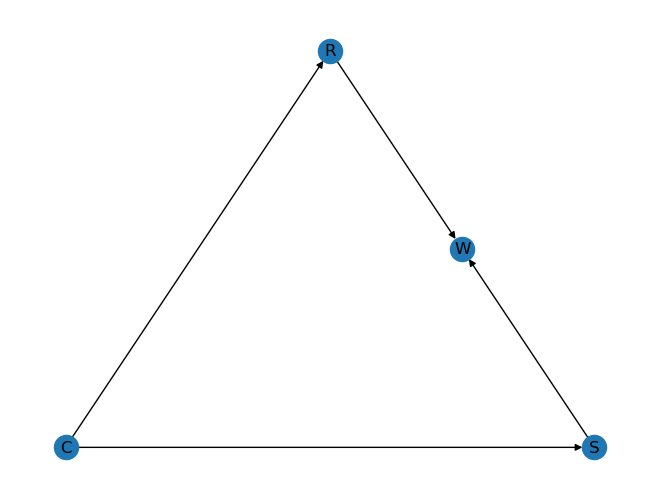

In [8]:
#define model
model = BayesianNetwork([('C','S'),('C','R'),('R','W'),('S','W')])
#model = BayesianNetwork([('Cloudy','Sprinkler'),('Cloudy','Rain'),('Rain','Wet grass'),('Sprinkler','Wet grass')])
pos = nx.planar_layout(model)
nx.draw(model, pos=pos, with_labels=True) 
plt.show()

In [9]:
# independence conditions
model.get_independencies()

(R ⟂ S | C)
(W ⟂ C | S, R)
(C ⟂ W | S, R)
(S ⟂ R | C)

Next, we define the conditional probability tables for all nodes, in this case: C,S,R,W

We then add them to the Bayesian network and cross-check that the netowrk is well defined.

In [10]:
#define CPT

#cloudy
CPT_C = TabularCPD(variable='C', variable_card=2, 
                   values=[[0.5], [0.5]])

#sprinkler
CPT_S = TabularCPD(variable='S', variable_card=2,
                   values=[ [0.5, 0.9],
                            [0.5, 0.1]
                          ],
                   evidence=['C'], evidence_card=[2]
                  )

#rain
CPT_R = TabularCPD(variable='R', variable_card=2,
                   values=[ [0.8, 0.2],
                            [0.2, 0.8]
                          ],
                   evidence=['C'], evidence_card=[2]
                  )

# wet grass
CPT_W = TabularCPD(variable='W', variable_card=2,
                   values=[ [1.0, 0.1, 0.1, 0.001],
                            [0.0, 0.9, 0.9, 0.99]
                          ],
                   evidence=['S','R'], evidence_card=[2,2]
                  )
model.add_cpds(CPT_C, CPT_S, CPT_R, CPT_W)
model.check_model()

True

In [11]:
cardinality_C = model.get_cardinality('C')
print(cardinality_C)

2


Once the Bayesian network is fully defined we can use it for inference.

In the example below, we wish to estimate the probability for rain (R) given that we observe that the grass is wet (W=1).
You can experiment with different observations.

In [15]:
# Infering the posterior probability 
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
#posterior_p = infer.query(variables=['R'], evidence={'W': 0})
posterior_p = infer.query(variables=['R'], evidence={'C': 1, 'S': 0})
print(posterior_p)

+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.2000 |
+------+----------+
| R(1) |   0.8000 |
+------+----------+
